# Aircraft Risk Analysis

## Business Understanding

To successfully expand in the area of aviation for both commercial and private uses, the company must mitigate potential risks of aircrafts. In doing so the company can make strategic and informative decisions on what to apply their attention to in order to have a successful practice in aviation, but more importantly keep their clients safe.

## Data Understanding

A dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. Every aircraft in the data has an ID number to reference and includes information such as Make, Model, weather, purpose of flight and severity of injuries as an outcome.

## Data Preparation

The dataset was carefully cleaned to streamline its focus. Unnecessary columns were removed, and records before the year 2010 were filtered out. While NaNs in the 'Number of Engines' column were filled by the most occuring value, duplicates and other NaN values were cleared. Lastly a 'Safety Ratio' column is created by Total Fatal Injuries divided by the Total Accidents to measure the severity of accidents in relation to their occurrence.

The investigation zeroes in on three areas:

Time-based Analysis: Examining connections between accidents and weather conditions.

Location-based Analysis: Exploring accidents based on geographical location, specifically by state.

Engine Count and Aircraft Make: Investigating the correlation between the number of engines and the make of the plane and amount of accidents and fatal injuries

This approach ensures a clean and focused dataset for efficient analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Opening Data file
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [2]:
# Checking Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [3]:
# Gathering Columns I intend to work with
columns = ['Event.Id','Investigation.Type','Accident.Number','Event.Date','Location','Country','Aircraft.Category',
           'Make','Model','Number.of.Engines','Total.Fatal.Injuries']

# Creating a new df with columns wanted
new_df = df[columns].copy()

In [4]:
# Checking new columns
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Event.Id              88889 non-null  object 
 1   Investigation.Type    90348 non-null  object 
 2   Accident.Number       88889 non-null  object 
 3   Event.Date            88889 non-null  object 
 4   Location              88837 non-null  object 
 5   Country               88663 non-null  object 
 6   Aircraft.Category     32287 non-null  object 
 7   Make                  88826 non-null  object 
 8   Model                 88797 non-null  object 
 9   Number.of.Engines     82805 non-null  float64
 10  Total.Fatal.Injuries  77488 non-null  float64
dtypes: float64(2), object(9)
memory usage: 7.6+ MB


In [5]:
# Changing Event.Date Column to datetime data type
new_df['Event.Date'] = pd.to_datetime(new_df['Event.Date'])

# Filtering rows with years 2010 or greater
new_df = new_df[new_df['Event.Date'].dt.year >= 2010]

# Select rows with "Airplane" in 'Aircraft Category' column and making a copy to avoid errors
new_df = new_df[new_df['Aircraft.Category'] == 'Airplane'].copy()

# Checking for change in rows
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17807 entries, 67610 to 90345
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Event.Id              17807 non-null  object        
 1   Investigation.Type    17807 non-null  object        
 2   Accident.Number       17807 non-null  object        
 3   Event.Date            17807 non-null  datetime64[ns]
 4   Location              17807 non-null  object        
 5   Country               17807 non-null  object        
 6   Aircraft.Category     17807 non-null  object        
 7   Make                  17806 non-null  object        
 8   Model                 17799 non-null  object        
 9   Number.of.Engines     15469 non-null  float64       
 10  Total.Fatal.Injuries  17807 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 1.6+ MB


In [6]:
# Checking for duplicates
duplicates_before = new_df.duplicated()

# Printing the duplicate rows
print("Duplicates before deletion:")
print(new_df.loc[duplicates_before])

# Delete duplicates and creating a copy to avoid errors
clean_df = new_df.drop_duplicates().copy()

# Checking for duplicates again
duplicates_after = clean_df.duplicated()

# Confirming duplicate rows after deletion
print("\nDuplicates after deletion:")
print(clean_df.loc[duplicates_after])

Duplicates before deletion:
             Event.Id Investigation.Type Accident.Number Event.Date  \
88856  20220323104818           Accident      CEN22LA149 2022-03-18   
89830  20220822105776           Accident      ERA22LA379 2022-08-20   
89982  20220921105978           Incident      DCA22WA204 2022-09-14   

            Location        Country Aircraft.Category    Make  Model  \
88856  Grapevine, TX  United States          Airplane  CESSNA   208B   
89830   Bealeton, VA  United States          Airplane  BOEING  A75N1   
89982       Mumbai,           India          Airplane  BOEING    787   

       Number.of.Engines  Total.Fatal.Injuries  
88856                1.0                   0.0  
89830                1.0                   0.0  
89982                NaN                   0.0  

Duplicates after deletion:
Empty DataFrame
Columns: [Event.Id, Investigation.Type, Accident.Number, Event.Date, Location, Country, Aircraft.Category, Make, Model, Number.of.Engines, Total.Fatal.Injurie

In [7]:
# Checking for Nans in df
clean_df.isna().sum()

Event.Id                   0
Investigation.Type         0
Accident.Number            0
Event.Date                 0
Location                   0
Country                    0
Aircraft.Category          0
Make                       1
Model                      8
Number.of.Engines       2337
Total.Fatal.Injuries       0
dtype: int64

In [35]:
# Filling Nans with the mode value in column "Number of Engines"
engine_mode = clean_df['Number.of.Engines'].mode()[0]
clean_df['Number.of.Engines'].fillna(engine_mode, inplace=True)

# Dropping Nans for Make and Model 
master_df = clean_df.dropna()

# Checking for removal of Nans 
master_df.isna().sum()

Event.Id                0
Investigation.Type      0
Accident.Number         0
Event.Date              0
Location                0
Country                 0
Aircraft.Category       0
Make                    0
Model                   0
Number.of.Engines       0
Total.Fatal.Injuries    0
dtype: int64

In [36]:
# Checking df 
master_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Aircraft.Category,Make,Model,Number.of.Engines,Total.Fatal.Injuries
67610,20100104X13404,Accident,ERA10LA104,2010-01-01,"Doylestown, PA",United States,Airplane,CESSNA,150G,1.0,0.0
67611,20100106X32329,Accident,ERA10LA108,2010-01-01,"Concord, NC",United States,Airplane,PIPER,PA-32R-300,1.0,0.0
67612,20100103X60452,Accident,ERA10LA103,2010-01-02,"Somerset, KY",United States,Airplane,FAIRCHILD,SA227,2.0,0.0
67613,20100105X60423,Accident,CEN10CA087,2010-01-02,"Pearsall, TX",United States,Airplane,MAULE,M-4-220C,1.0,0.0
67615,20100714X13546,Incident,CEN10WA393,2010-01-02,"Sept-Iles, Canada",Canada,Airplane,Hawker Beechcraft Corp.,200,2.0,0.0


### Time

For the data sorting of time, a new dataframe was created to work with by the copy method, then the month was extracted from the 'Event.Date' column, the data was grouped by month, calculated total fatal injuries, total accidents, and safety ratio for each month. Lastly the dataframe was organized by the chronological order of months.

In [10]:
# Creating a new df to work with 
time_df = master_df.copy()

# adding a column 'Month' through the 'Event.Date' Column
time_df['Month'] = time_df['Event.Date'].dt.month_name()

# Creating a new df and grouping by Months
monthly_accidents = time_df.groupby('Month').agg({
    'Total.Fatal.Injuries': 'sum',
    'Event.Date': 'size'
}).reset_index()

#Creating a List of Months to use 
months_order =['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

# Converting 'Month' column to a categorical variable in Month order
monthly_accidents['Month'] = pd.Categorical(monthly_accidents['Month'],
                                            categories=months_order, ordered=True)

# Rename Event.Date to 'Total Accidents'
monthly_accidents = monthly_accidents.rename(columns={'Event.Date': 'Total Accidents'})

# Sorting Accidents by months
monthly_accidents = monthly_accidents.sort_values('Month')

# Creating Safety Ratio by Total Fatal Injuries/Total Accidents
monthly_accidents['Safety Ratio'] = monthly_accidents['Total.Fatal.Injuries'] / monthly_accidents['Total Accidents']

monthly_accidents

,Month,Total.Fatal.Injuries,Total Accidents,Safety Ratio
4,January,739.0,985,0.750254
3,February,620.0,1050,0.590476
7,March,1229.0,1339,0.917849
0,April,693.0,1361,0.509184
8,May,1185.0,1707,0.694200
6,June,624.0,1967,0.317234
5,July,1355.0,2160,0.627315
1,August,783.0,1989,0.393665
11,September,664.0,1780,0.373034
10,October,993.0,1460,0.680137


### Location 

For the location data, a new dataframe was created to work with. The dataframe is changed to include only accidents in the United States. From the 'Location' column the state code was stripped from the string value and inserted into a new column named 'State'. Doing so allows us to isolate the accidents by state. Uneccessary state codes were removed, and the dataframe was grouped by state, total fatal injuries, total accidents, and safety ratio was created for each state. The dataframe was then sorted by descending total accidents.

In [11]:
# Creating a new df to work with
location_df = master_df.copy()

# Only keeping United States from the country column
location_df = location_df[location_df['Country'] =='United States']

In [12]:
# Making a new column and extracting the state from the 'Location' column
location_df['State'] = location_df['Location'].apply(lambda x: x.split(',')[-1].strip() if ',' in str(x) else None)

# Making a new df and grouping by State, Total Fatal Injuries, and Total Accidents
state_accident_count = location_df.groupby('State').agg({
    'Total.Fatal.Injuries': 'sum',
    'Event.Id': 'size'
}).reset_index()

# Rename the count column to 'Accident Count' and 'Location' to 'Total Accidents'
state_accident_count = state_accident_count.rename(columns={'Event.Id': 'Total Accidents'})

# Drops rows where the state column is blank
state_accident_count = state_accident_count[state_accident_count['State'].str.strip() != '']

# Sorted to descending
state_accident_count =state_accident_count.sort_values(by='Total Accidents', ascending=False)

# Checking Values of States to check for unwanted country codes or territories
state_accident_count['State'].value_counts()

VT    1
DE    1
OF    1
MT    1
MD    1
SC    1
RI    1
HI    1
GA    1
IN    1
MS    1
VA    1
ID    1
PO    1
AO    1
NH    1
ME    1
CO    1
NY    1
MA    1
PR    1
NC    1
LA    1
OK    1
OR    1
NM    1
WA    1
TN    1
CT    1
AK    1
WY    1
DC    1
KS    1
TX    1
MN    1
MI    1
PA    1
ND    1
KY    1
IA    1
AR    1
NV    1
NE    1
WI    1
NJ    1
SD    1
OH    1
GM    1
UT    1
AZ    1
FL    1
AL    1
CA    1
MO    1
IL    1
WV    1
Name: State, dtype: int64

In [13]:
# List of State Codes to Remove
codes_to_remove = ['AO', 'OF', 'PO', 'DC', 'GU', 'GM', 'VI','PR']

# Removing Codes not used for the United States of America 
state_accident_count = state_accident_count[~state_accident_count['State'].isin(codes_to_remove)]

#Creating a Safety Column by Total Fatalities/Total Accidents
state_accident_count['Safety Ratio'] = state_accident_count['Total.Fatal.Injuries'] / state_accident_count['Total Accidents']

state_accident_count

,State,Total.Fatal.Injuries,Total Accidents,Safety Ratio
6,CA,447.0,1350,0.331111
49,TX,342.0,1222,0.279869
11,FL,317.0,1116,0.284050
1,AK,224.0,1080,0.207407
5,AZ,144.0,550,0.261818
7,CO,150.0,483,0.310559
53,WA,93.0,457,0.203501
12,GA,174.0,447,0.389262
16,ID,84.0,369,0.227642
30,NC,97.0,359,0.270195


### Number of Engines

For the number of engines data, a new dataframe was created to work with. Removed values representing zero engines, then grouped the data by total fatal injuries, total accidents, and the safety ratio was created for each amount of engines a airplane had.

In [14]:
# Creating a new df to work with
engine_df = master_df.copy()

In [15]:
# Checking values of column 'Number of Engines'
engine_df['Number.of.Engines'].value_counts()

1.0    15473
2.0     2236
4.0       69
3.0       15
6.0        1
8.0        1
0.0        1
Name: Number.of.Engines, dtype: int64

In [16]:
# Removing the values that represent zero engines
engine_df = engine_df[engine_df['Number.of.Engines'] != 0]

In [17]:
# Checking for removal of value
engine_df['Number.of.Engines'].value_counts()

1.0    15473
2.0     2236
4.0       69
3.0       15
6.0        1
8.0        1
Name: Number.of.Engines, dtype: int64

In [18]:
# Creating a new df grouped by number of engines, total fatal injuries, and Total Accidents
new_engine_df = engine_df.groupby('Number.of.Engines').agg({
    'Total.Fatal.Injuries': 'sum',
    'Event.Id':'size'
}).reset_index()

# Rename the count column to 'Accident Count' and 'Location' to 'Total Accidents'
new_engine_df = new_engine_df.rename(columns={'Event.Id': 'Total Accidents'})

# Creating a Safety Ratio Column bt Total Fatal Accidents/Total Accidents
new_engine_df['Safety Ratio'] = new_engine_df['Total.Fatal.Injuries'] / new_engine_df['Total Accidents']

new_engine_df

,Number.of.Engines,Total.Fatal.Injuries,Total Accidents,Safety Ratio
0,1.0,8063.0,15473,0.521101
1,2.0,1927.0,2236,0.861807
2,3.0,168.0,15,11.200000
3,4.0,26.0,69,0.376812
4,6.0,0.0,1,0.000000
5,8.0,0.0,1,0.000000


### Makes With 4 Engines

Further investigating Makes of airplanes with four engines by creating a new dataframe that only included rows where the column 'Number.of.Engines' equalled four. The dataframe Make values were cleaned, the data was then grouped by make, total fatal injuries, total accidents and safety ratio.

In [19]:
# Creating a new df with entries only having 4 engines
# and has columns 'Make','Model', and 'Total Fatal Injuries'
four_engines = engine_df[engine_df['Number.of.Engines'] == 4][['Make','Model','Total.Fatal.Injuries']]

In [20]:
# Checking value counts
four_engines['Make'].value_counts()

BOEING                            45
DOUGLAS                            7
BAE                                3
LOCKHEED                           3
Boeing                             3
AIRBUS                             2
British Aerospace Civil Aircr      1
PYKA INC                           1
BRITISH AEROSPACE                  1
BAE SYSTEMS (OPERATIONS) LIMIT     1
FACEBOOK UK LTD                    1
ANTONOV                            1
Name: Make, dtype: int64

In [21]:
# Cleaning Make values
# Removing value Facebook UK LTD
four_engines = four_engines[four_engines['Make'] != 'FACEBOOK UK LTD']

# Changing all values to lowercase
four_engines['Make'] = four_engines['Make'].str.lower()

# List of name corrections for 'British Aerospace'
bae_changes = ['bae','bae systems (operations) limit','british aerospace civil aircr']
bae_value = 'british aerospace'

# Commiting name changes for 'British Aerospace' and returning to uppercase
four_engines['Make'] = four_engines['Make'].replace(bae_changes, bae_value)

# Changing back to all capitalized
four_engines['Make'] = four_engines['Make'].str.upper()

In [22]:
# Making a new df and grouping Make, total fatal injuries, and total accidents
make_engines = four_engines.groupby(['Make']).agg({
    'Total.Fatal.Injuries': 'sum',
    'Model': 'count'
}).reset_index()

# Rename the count column to 'Total Accidents'
make_engines = make_engines.rename(columns={'Model': 'Total Accidents'})

# Sorting the df by Total accidents descending
make_engines = make_engines.sort_values(by='Total Accidents', ascending=False)

# Creating a Safety Ratio by Total Fatal Injuries / Total Accidents
make_engines['Safety Ratio'] = make_engines['Total.Fatal.Injuries'] / make_engines['Total Accidents']
make_engines

,Make,Total.Fatal.Injuries,Total Accidents,Safety Ratio
2,BOEING,24.0,48,0.500000
4,DOUGLAS,0.0,7,0.000000
3,BRITISH AEROSPACE,0.0,6,0.000000
5,LOCKHEED,2.0,3,0.666667
0,AIRBUS,0.0,2,0.000000
1,ANTONOV,0.0,1,0.000000
6,PYKA INC,0.0,1,0.000000


## Exploratory Data Analysis

For each section we cleaned and sorted, graphs were created for total fatal injuries, total accidents, and the safety ratio that was created by total fatal injuries divided by the total fatal accidents. From these graphs we're able to see trends in areas we can focus on.

### Time

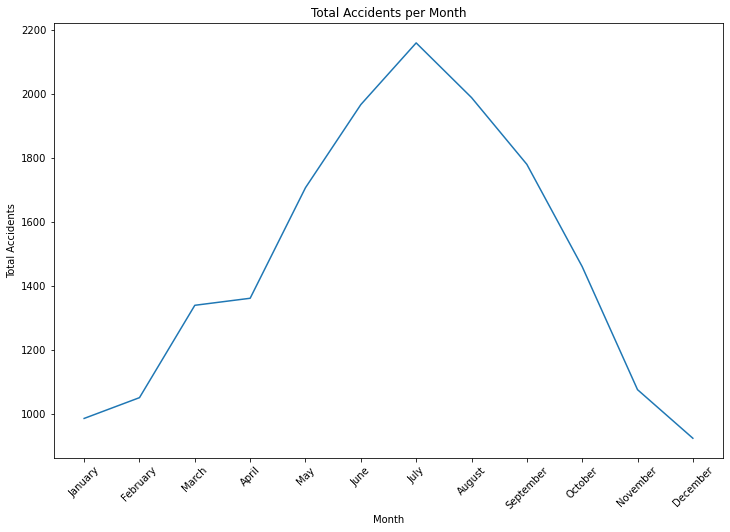

In [23]:
# Total Accidents per Month Line Chart

plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Total Accidents', data=monthly_accidents)
plt.xticks(rotation=45)
plt.title('Total Accidents per Month')
plt.show()

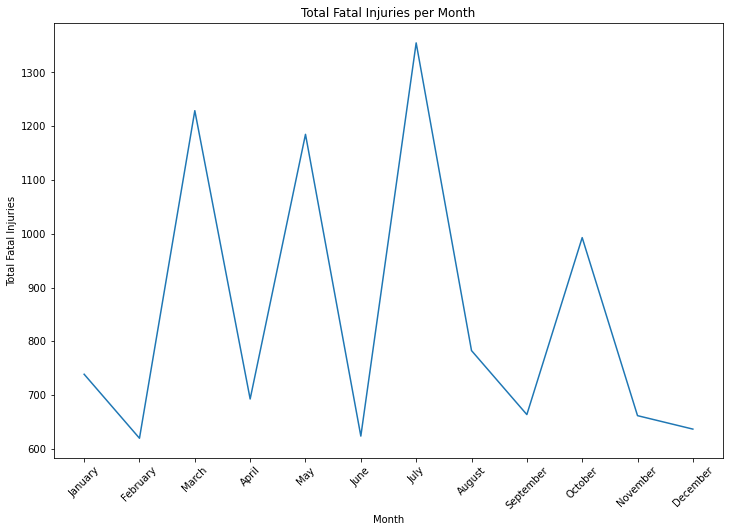

In [24]:
#Total Fatal Injuries per Month Line Chart

plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Total.Fatal.Injuries', data=monthly_accidents)
plt.xticks(rotation=45)
plt.ylabel('Total Fatal Injuries')
plt.title('Total Fatal Injuries per Month')
plt.show()

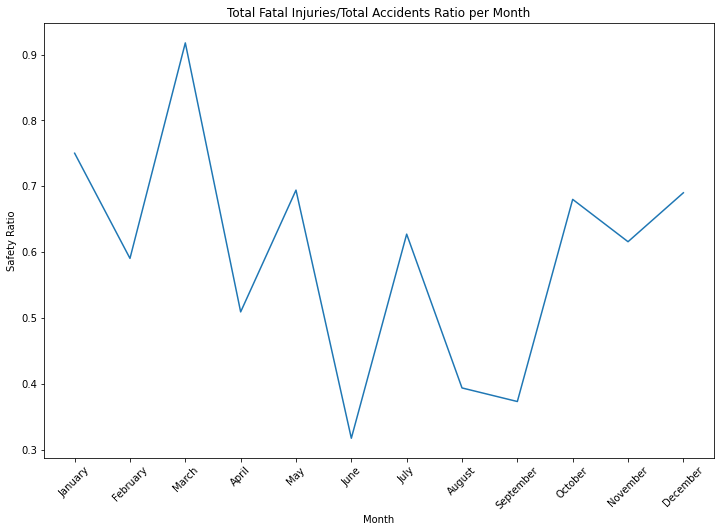

In [25]:
# Total Fatal Injuries/Total Accident Ratio per Month Line Plot

plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Safety Ratio', data=monthly_accidents)
plt.xticks(rotation=45)
plt.title('Total Fatal Injuries/Total Accidents Ratio per Month')
plt.show()

Although there are many accidents in the summer season the total fatal injuries/total accidents ratio is at its lowest. That could be that there are less flights in the winter seasons which could offset this ratio or accidents that tend to occur in the winter have more fatal injuries as an outcome.

### Location

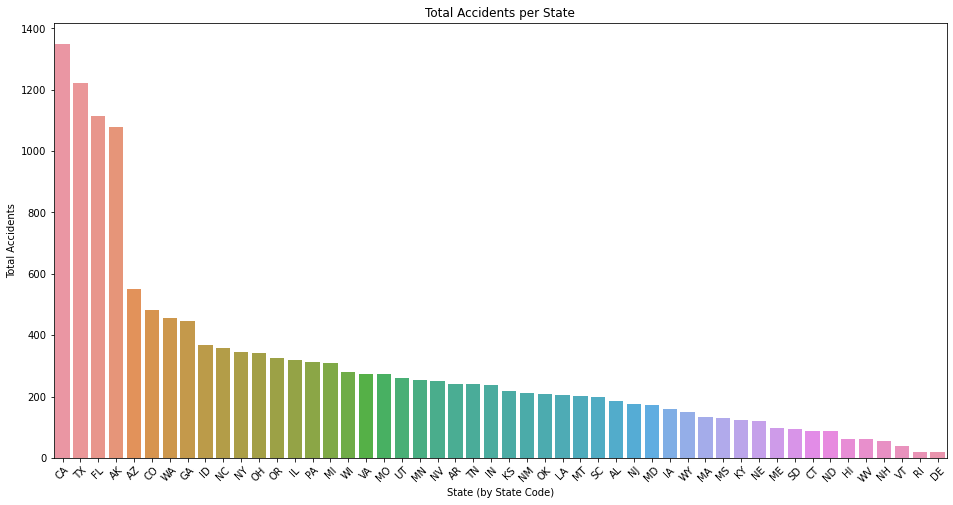

In [26]:
# Total Accident per State Bar Chart

plt.figure(figsize=(16, 8))
sns.barplot(x='State', y='Total Accidents', data=state_accident_count)
plt.xlabel('State (by State Code)')
plt.xticks(rotation=45)
plt.title('Total Accidents per State')
plt.show()

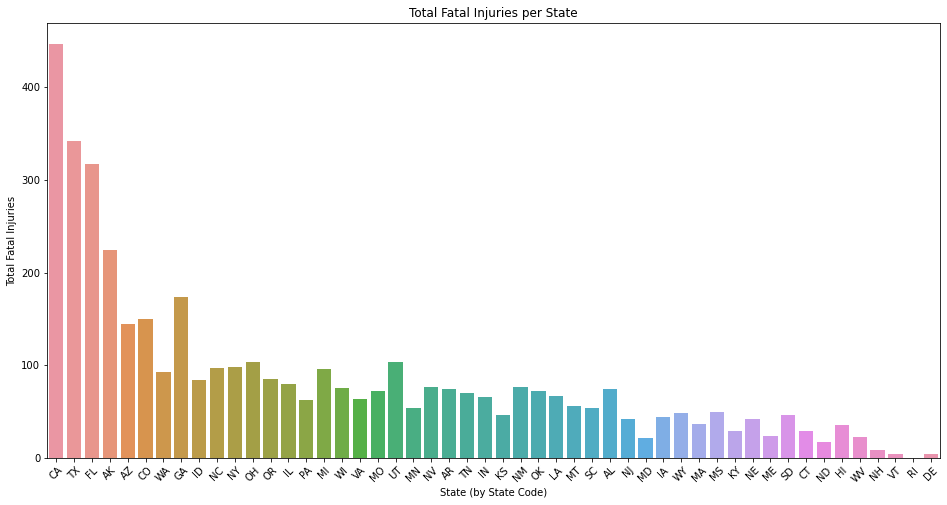

In [27]:
# Total Fatal Injuries per State Bar chart

plt.figure(figsize=(16, 8))
sns.barplot(x='State', y='Total.Fatal.Injuries', data=state_accident_count)
plt.xlabel('State (by State Code)')
plt.xticks(rotation=45)
plt.ylabel('Total Fatal Injuries')
plt.title('Total Fatal Injuries per State')
plt.show()

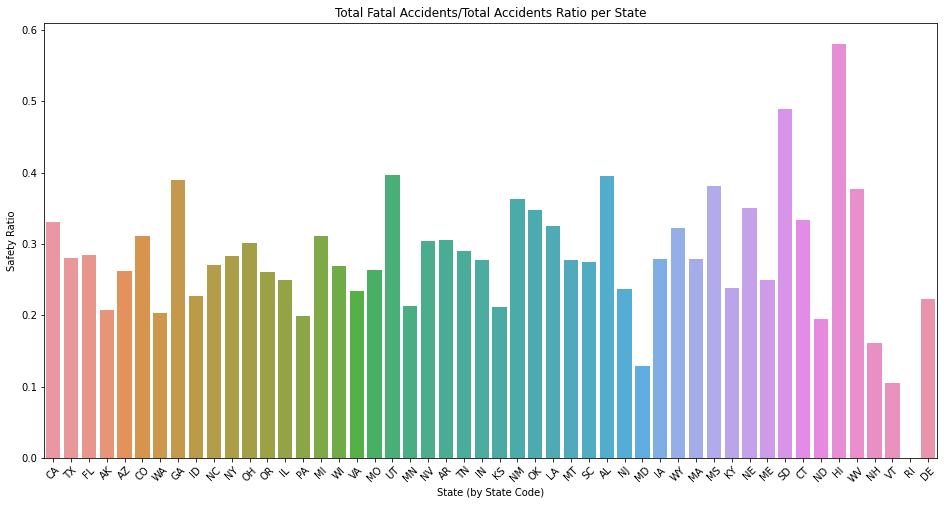

In [28]:
# Total Fatal Accident/Total Accident Ratio per State Bar Chart

plt.figure(figsize=(16, 8))
sns.barplot(x='State', y='Safety Ratio', data=state_accident_count)
plt.xlabel('State (by State Code)')
plt.xticks(rotation=45)
plt.title('Total Fatal Accidents/Total Accidents Ratio per State')
plt.show()

From the vizualizations, areas with high populations such as California, Texas, and Florida have higher amounts of accidents most likely due to higher traffic. Fatal Injuries also tend to be higher in the high traffic areas but looking at total fatalities/total accident ratio these high traffic areas tend to be lower than other states.

### Number of Engines

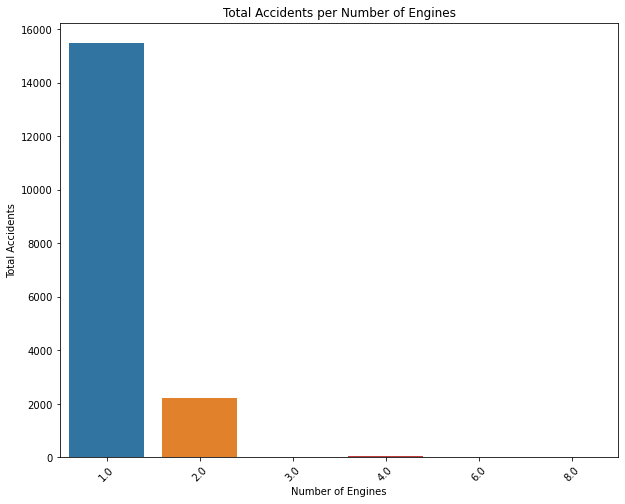

In [29]:
# Total Accidents per Number of Engines Bar Chart

plt.figure(figsize=(10, 8))
sns.barplot(x='Number.of.Engines', y='Total Accidents', data=new_engine_df)
plt.xticks(rotation=45)
plt.xlabel('Number of Engines')
plt.title('Total Accidents per Number of Engines')
plt.show()

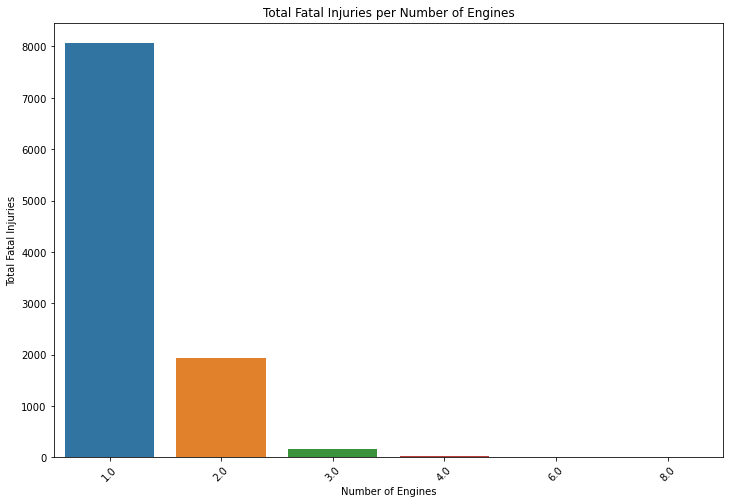

In [30]:
# Total Fatal Injuries per Number of Engines  Bar Chart

plt.figure(figsize=(12, 8))
sns.barplot(x='Number.of.Engines', y='Total.Fatal.Injuries', data=new_engine_df)
plt.xticks(rotation=45)
plt.xlabel('Number of Engines')
plt.ylabel('Total Fatal Injuries')
plt.title('Total Fatal Injuries per Number of Engines')
plt.show()

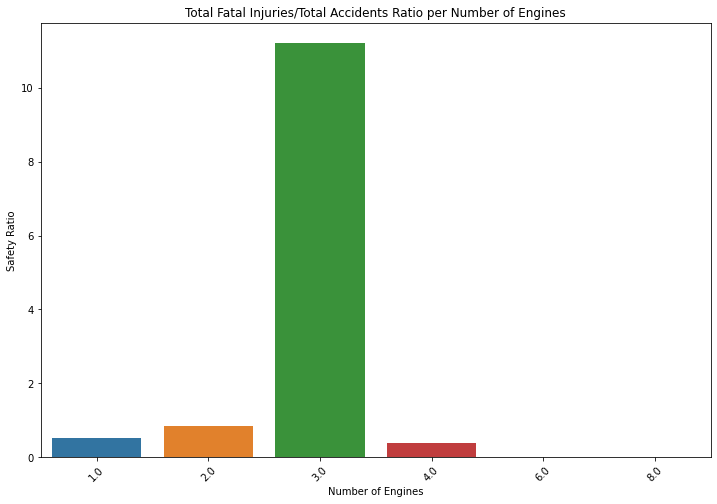

In [31]:
# Total Fatal Injuries/Total Accidents Ratio per Number of Engines

plt.figure(figsize=(12, 8))
sns.barplot(x='Number.of.Engines', y='Safety Ratio', data=new_engine_df)
plt.xlabel('Number of Engines')
plt.xticks(rotation=45)
plt.title('Total Fatal Injuries/Total Accidents Ratio per Number of Engines')
plt.show()

### Four Engine Makes

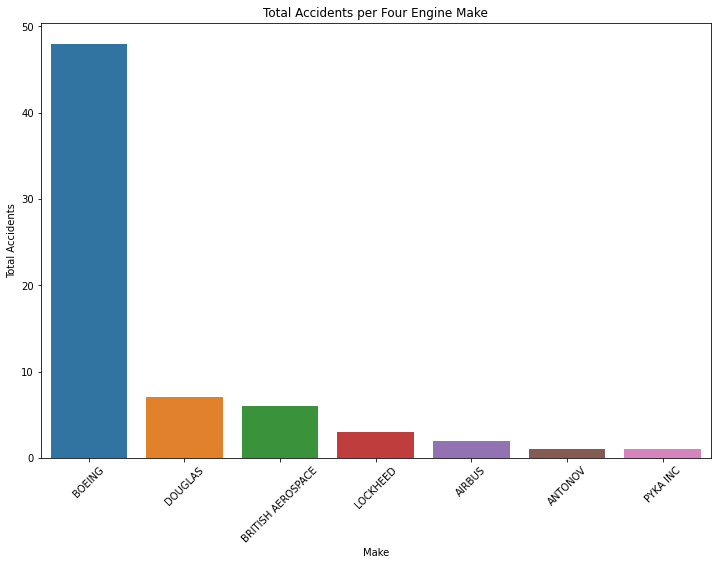

In [32]:
# Total Accidents per Four Engine Make Bar Chart

plt.figure(figsize=(12, 8))
sns.barplot(x='Make', y='Total Accidents', data=make_engines)
plt.xticks(rotation=45)
plt.title('Total Accidents per Four Engine Make')
plt.show()

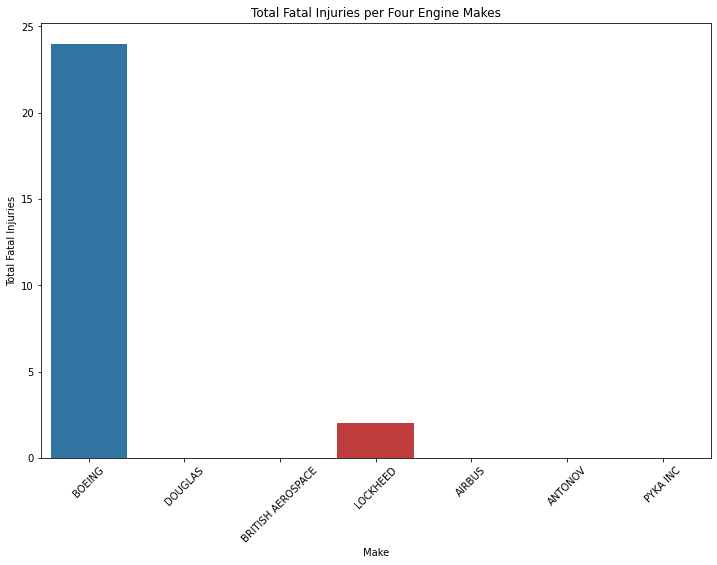

In [33]:
#Total Fatal Injuries per Four Engine Make Bar Chart

plt.figure(figsize=(12, 8))
sns.barplot(x='Make', y='Total.Fatal.Injuries', data=make_engines)
plt.xticks(rotation=45)
plt.ylabel('Total Fatal Injuries')
plt.title('Total Fatal Injuries per Four Engine Makes')
plt.show()

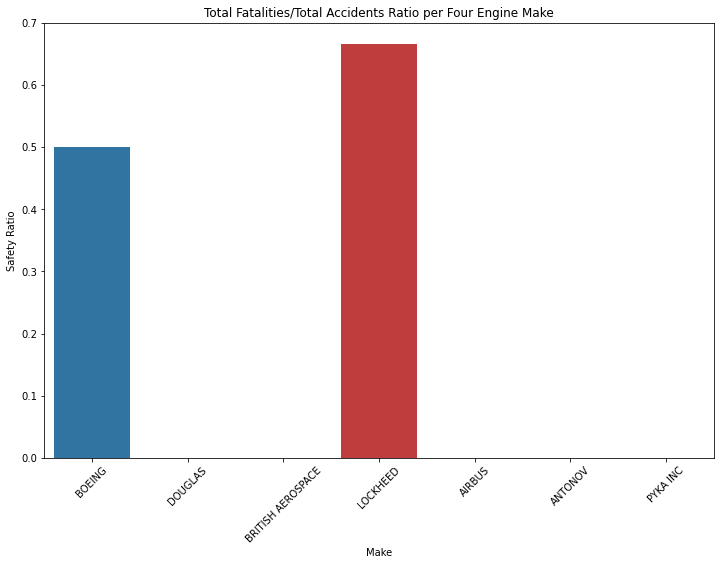

In [34]:
# Total Fatal Injuries/Total Accident Ratio per Four Engine Make

plt.figure(figsize=(12, 8))
sns.barplot(x='Make', y='Safety Ratio', data=make_engines)
plt.xticks(rotation=45)
plt.title('Total Fatalities/Total Accidents Ratio per Four Engine Make')
plt.show()

Total accidents and total fatal injuries tend to decrease as the amount of engines increase. The safety ratio indicates a unexpected large jump for accidents that involve three engines, a further investigation may be needed in that area. Focusing on this trend of more engines less accidents we take this finding and apply it Makes of airplanes that have four engines. Besides Boeing having close to fifty accidents other Makes of airplane have less than ten accidents. Five out of seven of makes have zero fatal injuries. Although the safety ratio for Lockheed is high, the makes with four engines tend to be safe looking at the total fatal injuries and total accidents.

## Conclusion

### Recommendations

1: Time-Based Safety Measures:

Leverage the insights derived from the dataset's time analysis to implement time-specific safety measures. Identify months with historically higher safety ratios and focus on targeted training programs and operational enhancements during these periods, and enhance communication protocols to address seasonal challenges. 

2: Regional Safety Initiatives:

Based on location-specific safety ratios, introduce region-specific safety initiatives. Collaborate with aviation authorities and local operators in states with lower safety ratios to address regional challenges. Share best practices, and tailor safety protocols to the unique characteristics of each location, thereby contributing to improved safety outcomes.

3: Engine Configuration Awareness:

Given the dataset's insights into the total fatal injuries, total accidents, and safety ratios; consider promoting the advantages of four-engine aircraft or higher in training modules and operational guidelines. Encourage the company to consider this information in their decision-making processes regarding fleet composition, maintenance planning, and overall risk mitigation strategies.

With these recommendations with the time, location, and engine configuration insights provided by the dataset, these measures aim to address potential risk areas within the aviation industry. This approach enhances the effectiveness of risk mitigation strategies, fostering a safe industry, and continuous improvement across different areas of aviation operations.

### Limitations

Correlations identified in the dataset do not necessarily imply causation, other factors not considered in the dataset may influence accident patterns

In aviation safety there are usually multiple factors at hand such as human error and mechanical maintenence.


 




### Next Steps

Deeper exploration may include more information to lower risks even more. Areas for futher exploration in the dataset include, models, weather, and purpose of flight.

Additionally, a new investigation of human factors or the occurances of maintenance could also show a higher or lower likelihood of accidents or sustained injuries.